# 1. Dataset Selection & Loading:
• Choose a dataset from Kaggle based on your interest (Healthcare, Retail, Finance, etc.).

• Load the dataset using pandas and inspect its structure.



In [ ]:
# Choose a dataset from Kaggle is Retail
# Load the dataset using pandas and inspect its structure.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('retail.csv')

In [ ]:
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


# 2. Data Cleaning & Preprocessing:
• Handle missing values.

• Encode categorical variables.

• Normalize or standardize numerical columns if necessary.

In [ ]:
# missing values
df.isnull().sum()

,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


In [ ]:
# Encode categorical variables.
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Gender']=encoder.fit_transform(df['Gender'])

In [ ]:
le_encoder=LabelEncoder()
df['Product Category']=le_encoder.fit_transform(df['Product Category'])

In [ ]:
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,1,34,0,3,50,150
1,2,2023-02-27,CUST002,0,26,1,2,500,1000
2,3,2023-01-13,CUST003,1,50,2,1,30,30
3,4,2023-05-21,CUST004,1,37,1,1,500,500
4,5,2023-05-06,CUST005,1,30,0,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,1,62,1,1,50,50
996,997,2023-11-17,CUST997,1,52,0,3,30,90
997,998,2023-10-29,CUST998,0,23,0,4,25,100
998,999,2023-12-05,CUST999,0,36,2,3,50,150


# 3. Exploratory Data Analysis (EDA):
• Use matplotlib and seaborn to create scatter plots, histograms, and box plots to understand the dataset.

• Use groupby() to analyze trends in the dataset.

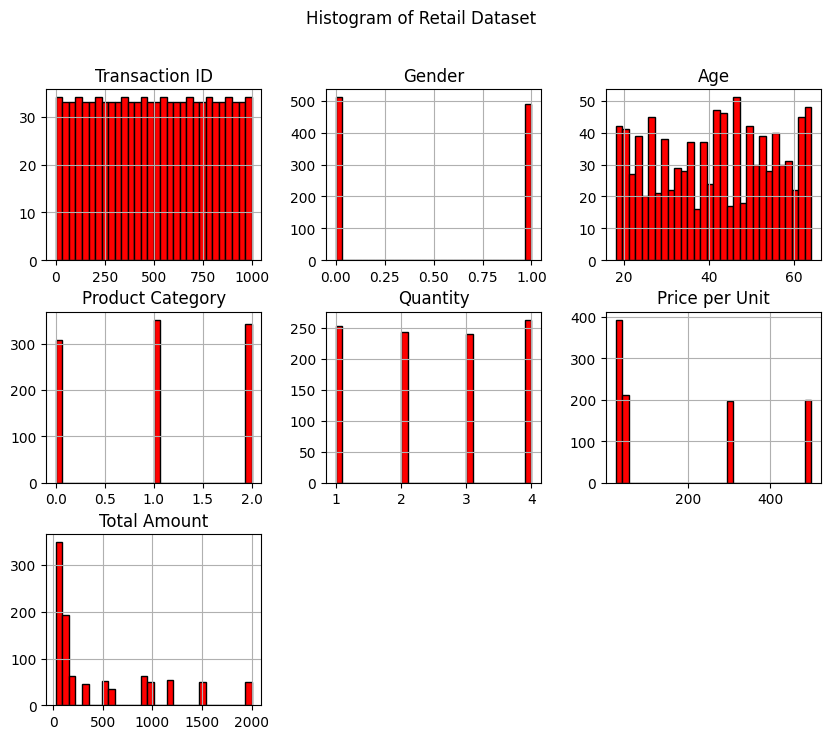

In [ ]:
# Use matplotlib and seaborn to create scatter plots, histograms, and box plots to understand the dataset.
df.hist(figsize=(10,8),bins=30,color='red',edgecolor='black')
plt.suptitle('Histogram of Retail Dataset')
plt.show()

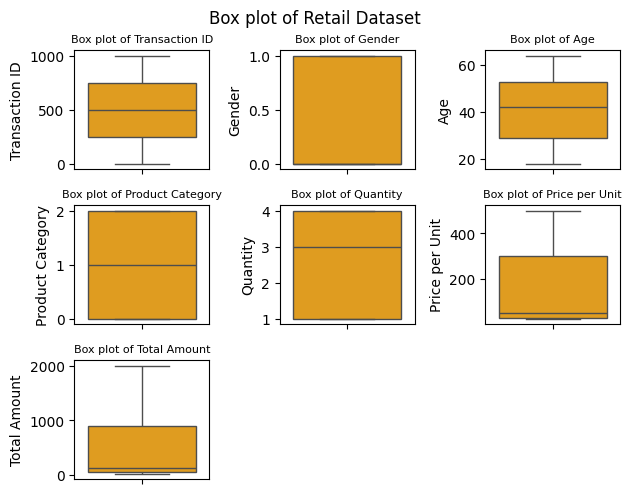

In [ ]:
columns = df.select_dtypes(include=['int64', 'float64']).columns
for i,column in enumerate(columns,1):
  plt.subplot(3,3,i)
  sns.boxplot(data=df[column],color='orange')
  plt.title(f'Box plot of {column}',fontsize=8)
plt.tight_layout()
plt.suptitle('Box plot of Retail Dataset',y=1.02)
plt.show()

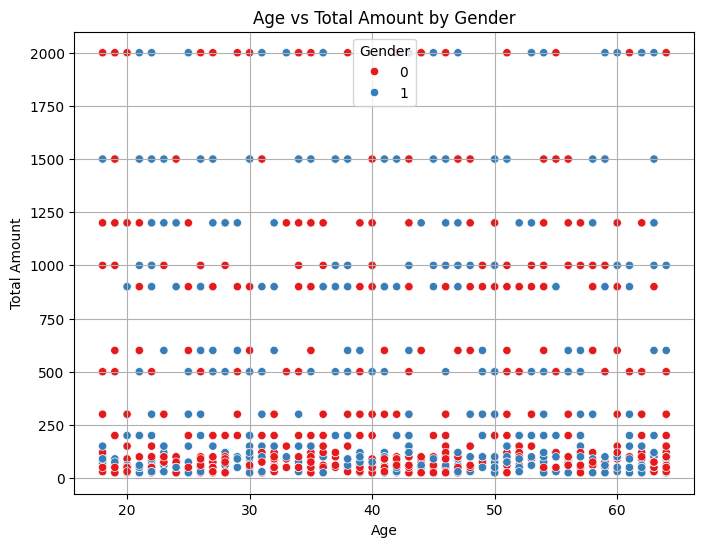

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Total Amount', hue='Gender', palette='Set1')
plt.title('Age vs Total Amount by Gender')
plt.xlabel('Age')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()

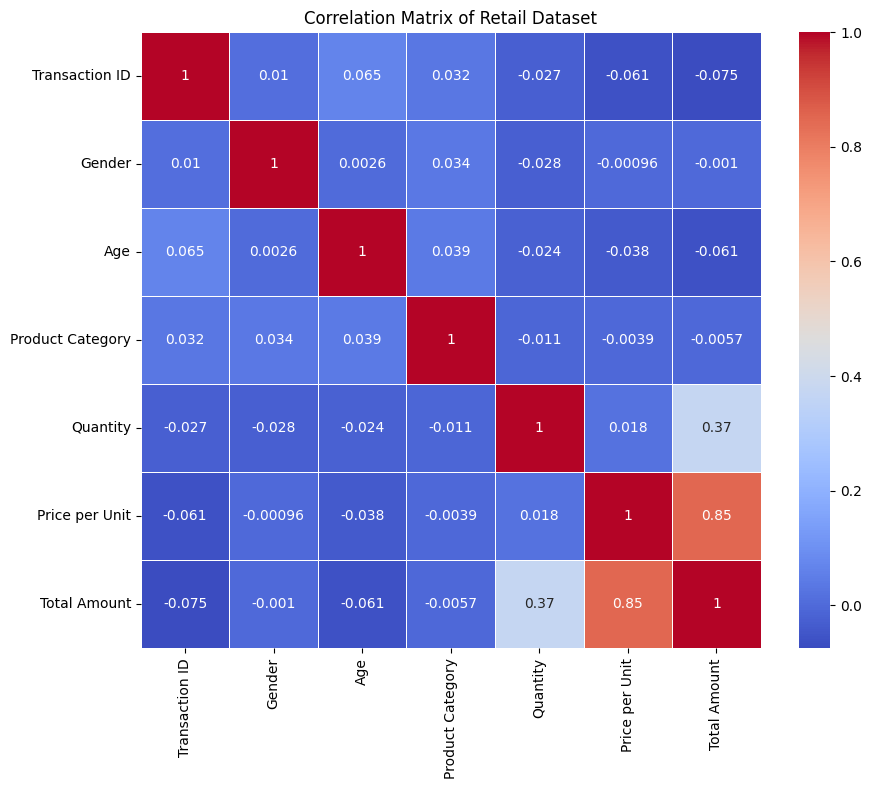

In [ ]:
# heat map
columns = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix=columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',linewidths=0.5)
plt.title('Correlation Matrix of Retail Dataset')
plt.show()

In [ ]:
# Use groupby() to analyze trends in the dataset.
df.groupby(by='Gender')['Total Amount'].sum().reset_index()

,Gender,Total Amount
0,0,232840
1,1,223160


# 4. Model Selection & Training:
• Choose an appropriate ML model (Logistic Regression for classification, Linear Regression for continuous prediction).

• Train the model on the dataset and evaluate its performance.

• Tune hyperparameters using GridSearchCV.

In [ ]:
# Choose an appropriate ML model (Logistic Regression for classification).
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,mean_squared_error,r2_score,confusion_matrix
columns = df.select_dtypes(include=['int64', 'float64']).columns
X=df[columns]
y=df['Gender']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
print(f'Accuracy Score: {accuracy*100:.2f}%')
print("Classification Report:")
print(classification_report(y_test,y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))
print(f'Mean Squared Error: {mean_squared_error(y_test,y_pred)}')
print(f'R2 Score: {r2_score(y_test,y_pred)}')

Accuracy Score: 100.00%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        95

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Confusion Matrix:
[[105   0]
 [  0  95]]
Mean Squared Error: 0.0
R2 Score: 1.0


In [ ]:
# Choose an appropriate ML model (Linear Regression for continuous prediction).
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
columns = df.select_dtypes(include=['int64', 'float64']).columns
X=df[columns]
y=df['Total Amount']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
y_pred_train=model.predict(X_train)

In [ ]:
training_data_accuracy = metrics.r2_score(y_train, y_pred_train)
print("Accuracy score of training data", training_data_accuracy)

Accuracy score of training data 1.0


In [ ]:
y_pred_test=model.predict(X_test)

In [ ]:
testing_data_accuracy = metrics.r2_score(y_test, y_pred_test)
print("Accuracy score of testing data", testing_data_accuracy)

Accuracy score of testing data 1.0


In [ ]:
# Labelencoder
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])

In [ ]:
columns = df.select_dtypes(include=['int64', 'float64']).columns
X = df[columns]
y = df['Gender']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Prediction System
input_data = np.array([[2,0,26,1,2,500,1000]])
prediction = model.predict(input_data)
predicted_gender = encoder.inverse_transform(prediction)[0]
print("Gender (Male:1,Female:0):", predicted_gender)

Gender (Male:1,Female:0): 0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Tune hyperparameters using GridSearchCV using RandomForest Classifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
columns = df.select_dtypes(include=['int64', 'float64']).columns
X=df[columns]
y=df['Total Amount']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
rfc=RandomForestRegressor()

In [ ]:
rfc.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred=rfc.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred))

1.0


In [ ]:
# Import GridSearchCV by using sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score

In [ ]:
forest_params=[{'max_depth':list(range(10,15)),'max_features':list(range(0,8))}]
clf=GridSearchCV(rfc,forest_params,cv=5,scoring='accuracy')

In [ ]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [10, 11, 12, 13, 14],
                          'max_features': [0, 1, 2, 3, 4, 5, 6, 7]}],
             scoring='accuracy')

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
print(clf.best_params_)
print(clf.best_score_)

{'max_depth': 10, 'max_features': 7}
1.0


In [ ]:
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Mean Squared Error:",mean_squared_error(y_test,y_pred))
print("R2 Score:",r2_score(y_test,y_pred))

Accuracy: 1.0
Mean Squared Error: 0.0
R2 Score: 1.0


# 5. Model Performance & Comparison:
• Evaluate model performance using appropriate metrics (Accuracy, RMSE, ROC-AUC,
etc.).

• Compare different models and justify why one performs better than the other.

In [ ]:
# Evaluate model performance using appropriate metrics (Accuracy, RMSE, ROC-AUC, etc.).
from sklearn.metrics import accuracy_score, mean_squared_error, roc_auc_score, classification_report, confusion_matrix, r2_score

In [ ]:
columns = df.select_dtypes(include=['int64', 'float64']).columns
X = df[columns]
y = df['Gender']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_continuous = model.predict(X_test)
y_pred_binary = np.round(y_pred_continuous).astype(int)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_binary)
mse = mean_squared_error(y_test, y_pred_continuous)
rmse = mse * 0.5
roc_auc = roc_auc_score(y_test, y_pred_continuous)
classification_rep = classification_report(y_test, y_pred_binary)
confusion_mat = confusion_matrix(y_test, y_pred_binary)
r2 = r2_score(y_test, y_pred_continuous)
print("Accuracy:", accuracy)
print("RMSE:", rmse)
print("MSE:", mse)
print("ROC-AUC:", roc_auc)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", confusion_mat)
print("R2 Score:", r2)

Accuracy: 1.0
RMSE: 8.22961952838815e-28
MSE: 1.64592390567763e-27
ROC-AUC: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        95

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Confusion Matrix:
 [[105   0]
 [  0  95]]
R2 Score: 1.0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier()
}

results = {}

for name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

  results[name] = {"Accuracy": acc, "ROC-AUC": roc_auc}
# Print results
for model, scores in results.items():
  print(f"{model}:\n  Accuracy: {scores['Accuracy']:.3f}\n  ROC-AUC: {scores['ROC-AUC']:.3f}\n")

Logistic Regression:
  Accuracy: 0.475
  ROC-AUC: 0.492

Decision Tree:
  Accuracy: 0.475
  ROC-AUC: 0.446

Random Forest:
  Accuracy: 0.495
  ROC-AUC: 0.453

KNN:
  Accuracy: 0.470
  ROC-AUC: 0.469



# 6. Feature Importance & Interpretation:
• Identify important features affecting the prediction.

• Use sklearn.feature_importances_ or SHAP to explain the model's decision -  making.


            Feature  Importance
0  Product Category    0.356707
3      Total Amount    0.324796
2    Price per Unit    0.161448
1          Quantity    0.157048


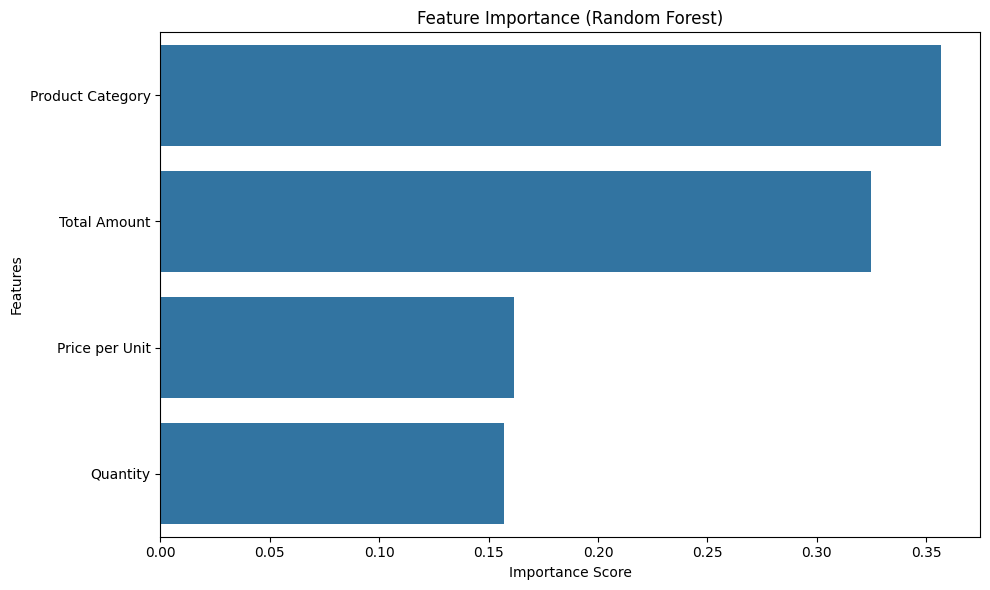

In [ ]:
# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names,'Importance': importances}).sort_values(by='Importance', ascending=False)

# Display the DataFrame
print(importance_df)

# Plot the top features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

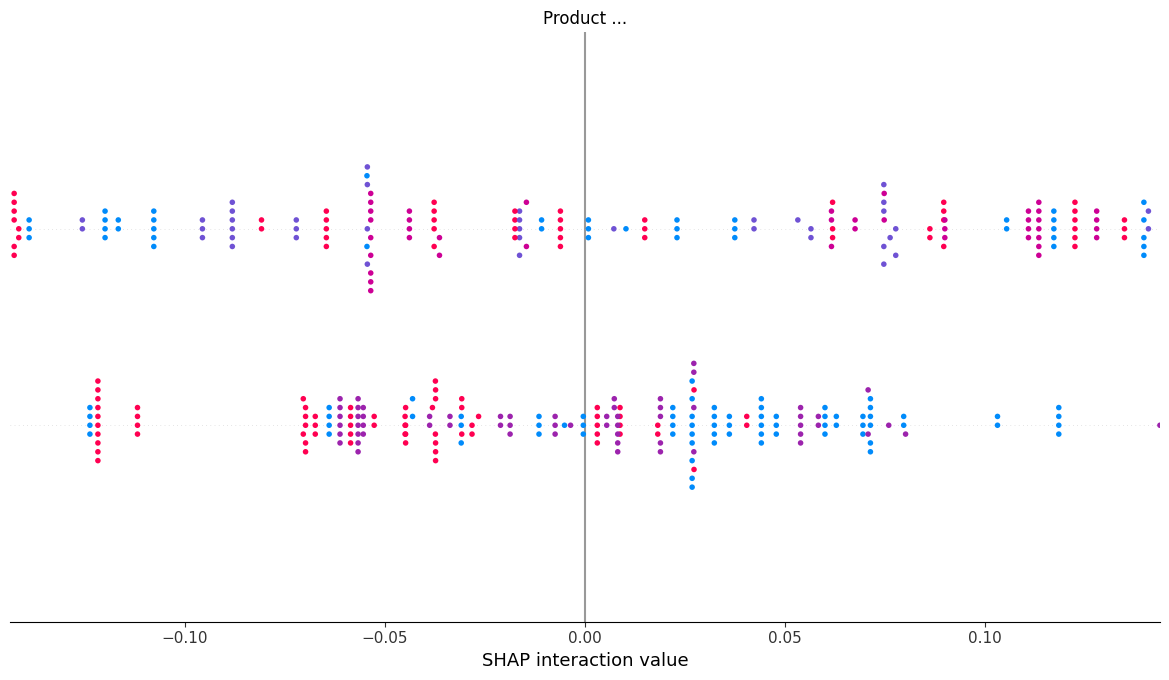

In [ ]:
import shap
# SHAP Explainer
explainer = shap.TreeExplainer(rfc_model)
shap_values = explainer.shap_values(X_test)

# Convert X_test to DataFrame (if not already)
X_test_df = pd.DataFrame(X_test, columns=X_train.columns)

# Summary plot for Class 1
shap.summary_plot(shap_values, X_test_df)